In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pathlib import Path

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, roc_auc_score, roc_curve, auc

In [3]:
bank_df = pd.read_csv(Path("../data/Cleaned_Data (1).csv"),header=0)

In [4]:
bank_df.columns

Index(['customer_id', 'vintage', 'age', 'dependents', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction', 'gender_Male', 'gender_other', 'occupation_retired',
       'occupation_salaried', 'occupation_self_employed', 'occupation_student',
       'customer_nw_category_2', 'customer_nw_category_3',
       'days_since_last_transaction'],
      dtype='object')

In [5]:
bank_df.head()

,customer_id,vintage,age,dependents,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,...,last_transaction,gender_Male,gender_other,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_2,customer_nw_category_3,days_since_last_transaction
0,1,0.036145,0.999130,0.0,-0.139994,-0.143093,-0.145822,-0.154164,-0.044473,-0.109674,...,2023-05-21,True,False,False,False,True,False,True,False,321.0
1,2,0.941979,-0.741743,0.0,-0.045800,0.030785,0.009493,0.154907,-0.044469,-0.109662,...,2023-11-01,True,False,False,False,True,False,True,False,157.0
2,5,0.872300,2.346902,0.0,-0.120032,-0.123099,-0.130492,-0.166632,-0.044470,-0.109665,...,2023-08-06,False,True,False,False,True,False,True,False,244.0
3,6,-1.878209,-0.348643,2.0,-0.152716,-0.144460,-0.141300,-0.142274,-0.044472,-0.085636,...,2023-11-03,True,False,False,False,True,False,False,True,155.0
4,7,-0.616643,-0.348643,0.0,0.189271,0.207272,0.191054,0.193770,-0.044471,-0.109668,...,2023-11-01,False,False,False,False,True,False,True,False,157.0


In [6]:
bank_df.drop(columns=["last_transaction"], inplace=True)

In [7]:
bank_df.drop(columns=["customer_id"], inplace=True)

### Logistic Regression

In [8]:
# Split the data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(bank_df.drop(columns=['churn']), bank_df['churn'], test_size=0.2, random_state=42)

In [9]:
# Define the logistic regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

/Users/harsha_gurram/miniconda3/envs/churnGuard/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
# Perform cross-validation to predict probabilities on the training set
y_train_proba = cross_val_predict(logistic_regression, X_train, y_train, cv=5, method='predict_proba')[:, 1]

# Find the optimal cutoff value using Youden's J statistic
fpr, tpr, thresholds = roc_curve(y_train, y_train_proba)
optimal_cutoff_index = np.argmax(tpr - fpr)
optimal_cutoff = thresholds[optimal_cutoff_index]

print("Optimal cutoff value:", optimal_cutoff)

/Users/harsha_gurram/miniconda3/envs/churnGuard/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/harsha_gurram/miniconda3/envs/churnGuard/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

Optimal cutoff value: 0.21365637157599124


/Users/harsha_gurram/miniconda3/envs/churnGuard/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
# Predict probabilities on the test set
y_test_proba = logistic_regression.predict_proba(X_test)[:, 1]

# Predict using the optimal cutoff value on the test set
y_test_pred = (y_test_proba >= optimal_cutoff).astype(int)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_proba)
print("Accuracy with optimal cutoff:", accuracy)
print("ROC AUC score:", roc_auc)

Accuracy with optimal cutoff: 0.7033273560470213
ROC AUC score: 0.6718310764219282


In [12]:
TP = sum((y_test == 1) & (y_test_pred == 1))
FN = sum((y_test == 1) & (y_test_pred == 0))

# Calculate Sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)

print("Sensitivity (True Positive Rate):", sensitivity)

Sensitivity (True Positive Rate): 0.47472745292368684


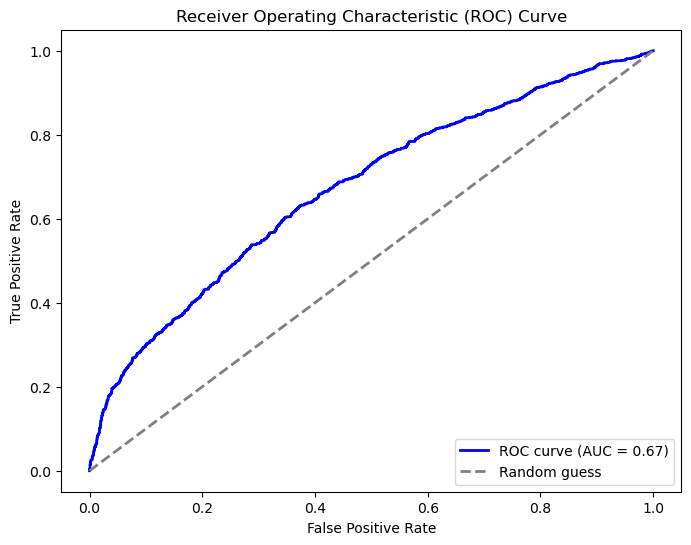

In [13]:
# Assuming y_test_proba and y_test are defined

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

# Calculate area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random guess')

# Set plot labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show plot
plt.show()

Value Counts

In [14]:
from imblearn.over_sampling import SMOTE

In [15]:
smote = SMOTE()
x_resampled,y_resampled = smote.fit_resample(X_train,y_train)

In [16]:
y_resampled.value_counts()

churn
1    16131
0    16131
Name: count, dtype: int64

In [17]:
# Define the logistic regression model
logistic_regression_O = LogisticRegression()
logistic_regression_O.fit(x_resampled, y_resampled)

/Users/harsha_gurram/miniconda3/envs/churnGuard/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
# Perform cross-validation to predict probabilities on the training set
y_train_proba = cross_val_predict(logistic_regression_O, x_resampled, y_resampled, cv=5, method='predict_proba')[:, 1]

# Find the optimal cutoff value using Youden's J statistic
fpr, tpr, thresholds = roc_curve(y_resampled, y_train_proba)
optimal_cutoff_index = np.argmax(tpr - fpr)
optimal_cutoff = thresholds[optimal_cutoff_index]

print("Optimal cutoff value:", optimal_cutoff)

/Users/harsha_gurram/miniconda3/envs/churnGuard/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/harsha_gurram/miniconda3/envs/churnGuard/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

Optimal cutoff value: 0.5266005533915394


/Users/harsha_gurram/miniconda3/envs/churnGuard/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
# Predict probabilities on the test set
y_test_proba = logistic_regression.predict_proba(X_test)[:, 1]

# Predict using the optimal cutoff value on the test set
y_test_pred = (y_test_proba >= optimal_cutoff).astype(int)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_proba)
print("Accuracy with optimal cutoff:", accuracy)
print("ROC AUC score:", roc_auc)

Accuracy with optimal cutoff: 0.8017533373181909
ROC AUC score: 0.6718310764219282


In [22]:
TP = sum((y_test == 1) & (y_test_pred == 1))
FN = sum((y_test == 1) & (y_test_pred == 0))

# Calculate Sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)

print("Sensitivity (True Positive Rate):", sensitivity)

Sensitivity (True Positive Rate): 0.023785926660059464


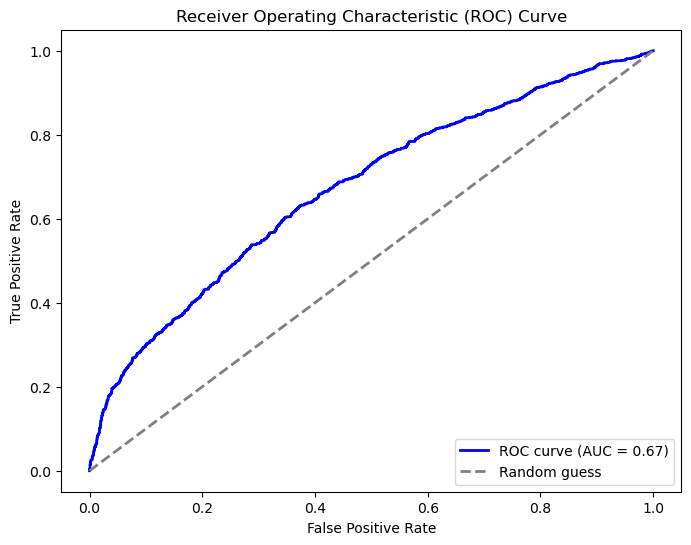

In [23]:
# Assuming y_test_proba and y_test are defined

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

# Calculate area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random guess')

# Set plot labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show plot
plt.show()